# **Lab Session : Feature extraction II**

Author: Vanessa Gómez Verdejo (http://vanessa.webs.tsc.uc3m.es/)

Updated: 27/02/2017 (working with sklearn 0.18.1)

In this lab session we are going to work with some of the kernelized extensions of most well-known feature extraction techniques: PCA, PLS and CCA.

As in the previous notebook, to analyze the discriminatory capability of the extracted features, let's use a linear SVM as classifier and use its final accuracy over the test data to evaluate the goodness of the different feature extraction methods.

To implement the different approaches we will base on [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.

#### ** During this lab we will cover: **
#### *Part 2: Non linear feature selection* 
##### *   Part 2.1: Kernel extensions of PCA*
##### *   Part 2.2: Analyzing the influence of the kernel parameter*
##### *  Part 2.3: Kernel MVA approaches*

As you progress in this notebook, you will have to complete some exercises. Each exercise includes an explanation of what is expected, followed by code cells where one or several lines will have written down `<FILL IN>`.  The cell that needs to be modified will have `# TODO: Replace <FILL IN> with appropriate code` on its first line.  Once the `<FILL IN>` sections are updated and the code can be run; below this cell, you will find the test cell (beginning with the line `# TEST CELL`) and you can run it to verify the correctness of your solution.  

In [1]:
%matplotlib inline

## *Part 2: Non linear feature selection* 

#### ** 2.0: Creating toy problem **

The following code let you generate a bidimensional problem consisting of thee circles of data with different radius, each one associated to a different class. 

As expected from the geometry of the problem, the classification boundary is not linear, so we will able to analyze the advantages of using no linear feature extraction techniques to transform the input space to a new space where a linear classifier can provide an accurate solution.


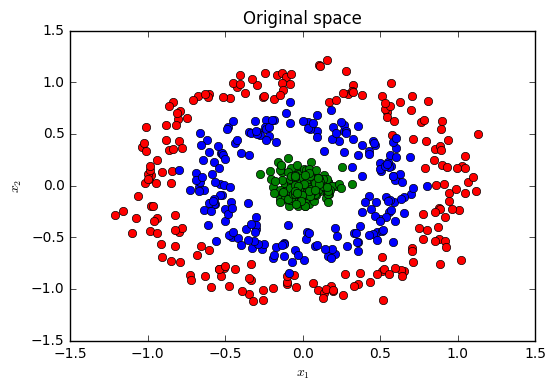

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


np.random.seed(0)
X, Y = make_circles(n_samples=400, factor=.6, noise=.1)

X_c2 = 0.1*np.random.randn(200,2)
Y_c2 = 2*np.ones((200,))

X= np.vstack([X,X_c2])
Y= np.hstack([Y,Y_c2])

plt.figure()
plt.title("Original space")
reds = Y == 0
blues = Y == 1
green = Y == 2

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.plot(X[green, 0], X[green, 1], "go")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize the labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin = label_binarize(Y_train, classes=set_classes)
Y_test_bin = label_binarize(Y_test, classes=set_classes)


### ** Part 2.1: Kernel PCA**

To extend the previous PCA feature extraction approach to its non-linear version, we can use of [KernelPCA( )](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) function. 

Let's start this section computing the different kernel matrix that we need to train and evaluate the different feature extraction methods. For this exercise, we are going to consider a Radial Basis Function kernel (RBF), where each element of the kernel matrix is given by $k(x_i,x_j) = \exp (- \gamma (x_i -x_j)^2)$. 

To analyze the advantages of the non linear feature extraction, let's compare it with its linear version. So, let's start computing both linear and kernelized versions of PCA. Complete the following code to obtain the variables (P_train, P_test) and (P_train_k, P_test_k) which have to contain, respectively, the projected data of the linear PCA and the KPCA.

To start to work, compute a maximum of two new projected features and fix gamma (the kernel parameter) to 1.

In [25]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.decomposition import PCA, KernelPCA

N_feat_max=2

# linear PCA
pca = PCA(n_components=N_feat_max)
pca.fit(X_train, Y_train)
P_train = pca.transform(X_train)
P_test = pca.transform(X_test)

# KPCA
pca_K = KernelPCA(n_components=N_feat_max, kernel="rbf", gamma=1)
pca_K.fit(X_train, Y_train)
P_train_k = pca_K.transform(X_train)
P_test_k =pca_K.transform(X_test)

print 'PCA and KPCA projections sucessfully computed'

PCA and KPCA projections sucessfully computed


Now, let's evaluate the discriminatory capability of the projected data (both linear and kernelized ones) feeding with them a linear SVM and measuring its accuracy over the test data. Complete the following to code to return in variables acc_test_lin and acc_test_kernel the SVM test accuracy using either the linear PCA projected data or the KPCA ones.

In [26]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Define SVM classifier
from sklearn import svm
clf = svm.SVC(kernel='linear')

# Train it using linear PCA projections and evaluate it
clf.fit(P_train, Y_train)
acc_test_lin = clf.score(P_test, Y_test)

# Train it using KPCA projections and evaluate it
clf.fit(P_train_k, Y_train)
acc_test_kernel = clf.score(P_test_k, Y_test)

print("The test accuracy using linear PCA projections is  %2.2f%%" %(100*acc_test_lin))
print("The test accuracy using KPCA projections is  %2.2f%%" %(100*acc_test_kernel))


The test accuracy using linear PCA projections is  24.00%
The test accuracy using KPCA projections is  95.33%


In [27]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(np.round(acc_test_lin,4), 0.2400, 'incorrect result: test accuracy using linear PCA projections is uncorrect')
Test.assertEquals(np.round(acc_test_kernel,4), 0.9533, 'incorrect result: test accuracy using KPCA projections is uncorrect')


1 test passed.
1 test passed.


Finally, let's analyze the transformation capabilities of the projected data using a KPCA vs. linear PCA plotting the resulting projected data for both training and test data sets.

Just run the following cells to obtain the desired representation. 

In [28]:
def plot_projected_data(data, label):
    
    """Plot the desired sample data assigning differenet colors according to their categories.
    Only two first dimensions of data ar plot and only three different categories are considered.

    Args:
        data: data set to be plot (number data x dimensions). 
        labes: target vector indicating the category of each data.
    """
    
    reds = label == 0
    blues = label == 1
    green = label == 2

    plt.plot(data[reds, 0], data[reds, 1], "ro")
    plt.plot(data[blues, 0], data[blues, 1], "bo")
    plt.plot(data[green, 0], data[green, 1], "go")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

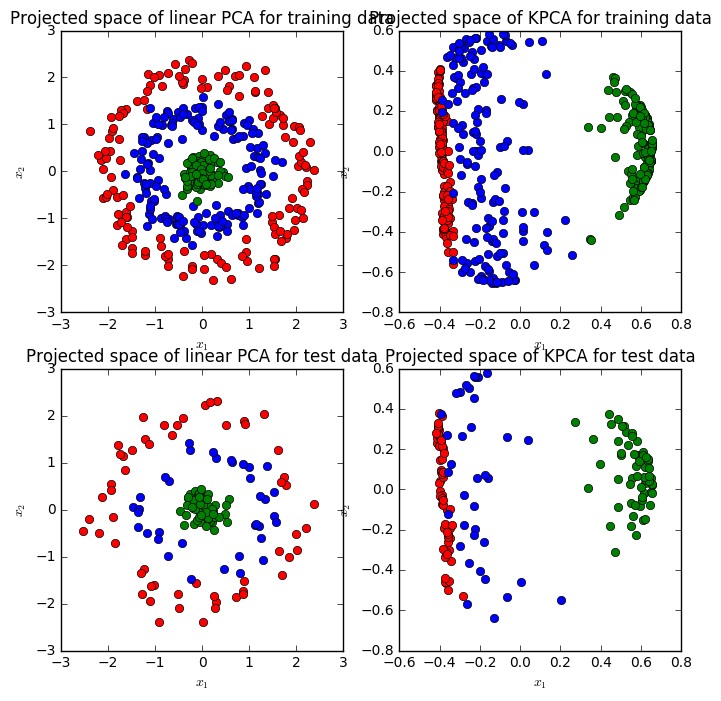

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.title("Projected space of linear PCA for training data")
plot_projected_data(P_train, Y_train)

plt.subplot(2,2,2)
plt.title("Projected space of KPCA for training data")
plot_projected_data(P_train_k, Y_train)

plt.subplot(2,2,3)
plt.title("Projected space of linear PCA for test data")
plot_projected_data(P_test, Y_test)

plt.subplot(2,2,4)
plt.title("Projected space of KPCA for test data")
plot_projected_data(P_test_k, Y_test)

plt.show()

Go to the first cell and modify the kernel parameter (for instance, set gamma to 10 or 100) and run the code again. What is it happening? Why? 


### ** Part 2.2: Analyzing the influence of the kernel parameter**

In the case of working with RBF kernel, the kernel width selection can be critical:
* If gamma value is too high the width of the RBF is reduced (tending to be a delta function) and, therefore, the interaction between the training data is null. So we project each data over itself and assign it a dual variable in such a way that the best possible projection (for classification purposes) of the training data is obtain (causing overfitting problems).
* If gamma value is close to zero, the RBF width increases and the kernel behavior tends to be similar to a linear kernel. In this case, the non-linear properties are lost.

Therefore, in this kind of applications, the value of kernel width can be critical and it's advised selecting it by cross validation.

This part of lab section aims to adjust the gamma parameter by a validation process. So, we will start creating a validation partition of the training data.

In [30]:
## Redefine the data partitions: creating a validation partition

# split training data into a training and validation set
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size=0.33)

# Normalizing the data
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Binarize the training labels for supervised feature extraction methods
set_classes = np.unique(Y)
Y_train_bin2 = label_binarize(Y_train2, classes=set_classes)

Now let's evaluate the KPCA performance when different values of gamma are used. So, complete the below code in such a way that for each gamma value you can:
* Train the KPCA and obtain the projections for the training, validation and test data.
* Obtain the accuracies of a linear SVM over the validation and test partitions.

Once, you have the validation and test accuracies for each gamma value, obtain the optimum gamma value (i.e., the gamma value which provides the maximum validation accuracy) and its corresponding test accuracy.

In [33]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.decomposition import KernelPCA
from sklearn import svm

np.random.seed(0)

# Defining parameters
N_feat_max = 2
rang_g = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50 , 100, 500, 1000]

# Variables to save validation and test accuracies
acc_val = []
acc_test = []

# Bucle to explore gamma values
for g_value in rang_g:
    print 'Evaluting with gamma ' + str(g_value)
    
    # 1. Train KPCA and project the data
    pca_K = KernelPCA(n_components=N_feat_max, kernel="rbf", gamma=g_value)
    pca_K.fit(X_train2, Y_train2)
    P_train_k = pca_K.transform(X_train2)
    P_val_k = pca_K.transform(X_val)
    P_test_k = pca_K.transform(X_test)
        
    # 2. Evaluate the projection performance
    clf = svm.SVC(kernel='linear')
    clf.fit(P_train_k, Y_train2)
    acc_val.append(clf.score(P_val_k, Y_val))
    acc_test.append(clf.score(P_test_k, Y_test))

# Find the optimum value of gamma and its corresponging test accuracy
pos_max = np.argmax(acc_test)
g_opt = rang_g[pos_max+1]
acc_test_opt = acc_test[pos_max]

print 'Optimum of value of gamma: ' + str(g_opt)
print 'Test accuracy: ' + str(acc_test_opt)


Evaluting with gamma 0.01
Evaluting with gamma 0.05
Evaluting with gamma 0.1
Evaluting with gamma 0.5
Evaluting with gamma 1
Evaluting with gamma 5
Evaluting with gamma 10
Evaluting with gamma 50
Evaluting with gamma 100
Evaluting with gamma 500
Evaluting with gamma 1000
Optimum of value of gamma: 1
Test accuracy: 0.946666666667


In [34]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(g_opt, 1, 'incorrect result: validated gamma value is uncorrect')
Test.assertEquals(np.round(acc_test_opt,4), 0.9467, 'incorrect result: validated test accuracy is uncorrect')


1 test passed.
1 test passed.


Finally, just run the next code to train the final model with the selected gamma value and plot the projected data

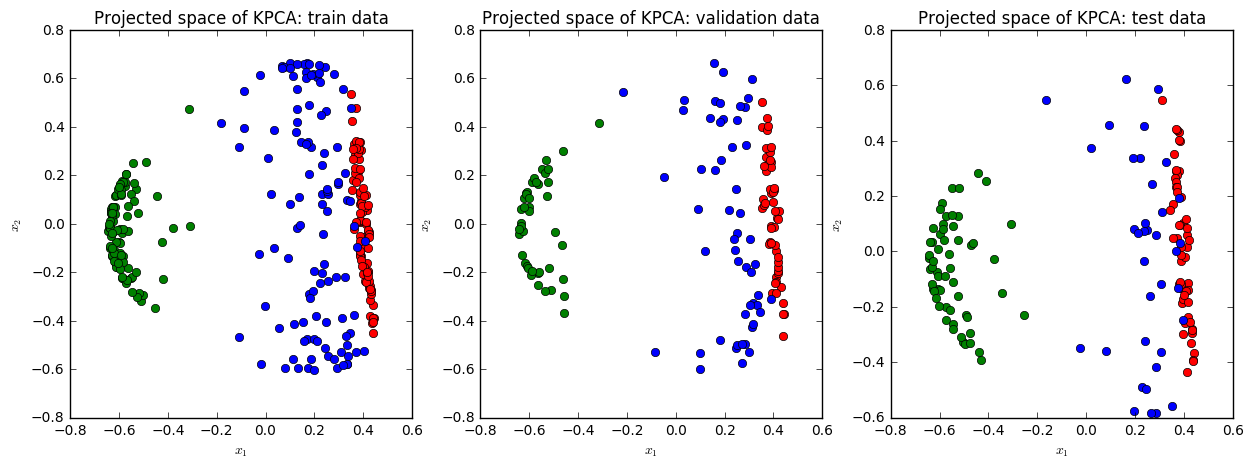

In [35]:
# Train KPCA and project the data
pca_K = KernelPCA(n_components=N_feat_max, kernel="rbf", gamma=g_opt)
pca_K.fit(X_train2)
P_train_k = pca_K.transform(X_train2)
P_val_k = pca_K.transform(X_val)
P_test_k = pca_K.transform(X_test)
   
# Plot the projected data
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title("Projected space of KPCA: train data")
plot_projected_data(P_train_k, Y_train2)

plt.subplot(1,3,2)
plt.title("Projected space of KPCA: validation data")
plot_projected_data(P_val_k, Y_val)

plt.subplot(1,3,3)
plt.title("Projected space of KPCA: test data")
plot_projected_data(P_test_k, Y_test)

plt.show()


### ** Part 2.3: Kernel MVA approaches**

Until now, we have only used the KPCA approach because is the only not linear feature extraction method that it is included in Scikit-Learn. 

However, if we compare linear and kernel versions of MVA approaches, we could extend any linear MVA approach to its kernelized version. In this way, we can use the same methods reviewed for the linear approaches and extend them to its non-linear fashion calling it with the training kernel matrix, instead of the training data, and the method would learn the dual variables, instead of the eigenvectors.

The following table relates both approaches:

|                           |        Linear             |           Kernel           |
|------                     |---------------------------|----------------------------|
|Input data                 |      ${\bf X}$            |         ${\bf K}$          | 
|Variables to compute (fit) |Eigenvectors (${\bf U}$)   |Dual variables (${\bf A}$)  | 
|Projection vectors         |      ${\bf U}$            |${\bf U}=\Phi^T {\bf A}$ (cannot be computed) |
|Project data (transform)   |${\bf X}' = {\bf U}^T {\bf X}^T$|${\bf X}' ={\bf  A}^T \Phi \Phi^T = {\bf  A}^T {\bf K}$|


** Computing and centering kernel matrix **

Let's start this section computing the different kernel matrix that we need to train and evaluate the different feature extraction methods. For this exercise, we are going to consider a Radial Basis Function kernel (RBF), where each element of the kernel matrix is given by $k(x_i,x_j) = \exp (- \gamma (x_i -x_j)^2)$.

In particular, we need to compute two kernel matrix:
* Training data kernel matrix (K_tr)  where the RBF is compute pairwise over the training data. The resulting matrix dimension is of $N_{tr} \times N_{tr}$, being $N_{tr}$ the number of training data.
* Test data kernel matrix (K_test) where the RBF is compute between training and test samples, i.e., in RBF expression the data $x_i$ belongs to test data whereas $x_j$ belongs to training data. The resulting matrix dimension is of $N_{test} \times N_{tr}$, being $N_{test}$ and $N_{tr}$ the number of test and training data, respectively.

Use the [rbf_kernel( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html) function to compute the K_tr and K_test kernel matrix. Fix the kernel width value (gamma) to 1.

In [49]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Computing the kernel matrix
from sklearn.metrics.pairwise import rbf_kernel

g_value = 1

# Compute the kernel matrix (use the X_train matrix, before dividing it in validation and training data)
K_tr = rbf_kernel(X_train, X_train, gamma=g_value)
K_test  = rbf_kernel(X_test, X_train, gamma=g_value)

In [50]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(K_tr.shape, (450,450), 'incorrect result: dimensions of training kernel matrix are uncorrect')
Test.assertEquals(K_test.shape, (150,450), 'incorrect result: dimensions of test kernel matrix are uncorrect')

1 test passed.
1 test passed.


After compute these kernel matrix, they have to be centered (in the same way that we remove the mean when we work over the input space). For this purpose, next code provides you the function center_K(). Use it properly to remove the mean of both K_tr and K_test matrix.

In [51]:
def center_K(K):
    """Center a kernel matrix K, i.e., removes the data mean in the feature space.

    Args:
        K: kernel matrix                                        
    """
    size_1,size_2 = K.shape;
    D1 = K.sum(axis=0)/size_1 
    D2 = K.sum(axis=1)/size_2
    E = D2.sum(axis=0)/size_1

    K_n = K + np.tile(E,[size_1,size_2]) - np.tile(D1,[size_1,1]) - np.tile(D2,[size_2,1]).T
    return K_n

In [52]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################

# Center the kernel matrix
K_tr_c = center_K(K_tr)
K_test_c = center_K(K_test)

In [53]:
###########################################################
# TEST CELL
###########################################################
from test_helper import Test

# TEST Training and test data generation
Test.assertEquals(np.round(K_tr_c[0][0],2), 0.55, 'incorrect result: centered training kernel matrix is uncorrect')
Test.assertEquals(np.round(K_test_c[0][0],2), -0.24, 'incorrect result: centered test kernel matrix is uncorrect')

1 test passed.
1 test passed.


** Alternative KPCA formulation **

Complete the following code lines to obtain a KPCA implementaion using the linear PCA function and the kernel matrix as input data. Later, compare its result with that of the KPCA function.

In [56]:
###########################################################
# TODO: Replace <FILL IN> with appropriate code
###########################################################
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import svm

# Defining parameters
N_feat_max = 2


## PCA method (to complete)
# 1. Train PCA with the kernel matrix and project the data
pca_K2 = PCA(n_components=N_feat_max)
pca_K2.fit(K_tr_c, Y_train) 
P_train_k2 = pca_K2.transform(K_tr_c) 
P_test_k2 = pca_K2.transform(K_test_c)
        
# 2. Evaluate the projection performance
clf = svm.SVC(kernel='linear')
clf.fit(P_train_k2, Y_train)
print 'Test accuracy with PCA with a kenel matrix as input: '+ str(clf.score(P_test_k2, Y_test))

## KPCA method (for comparison purposes)
# 1. Train KPCA and project the data
# Fixing gamma to 0.5 here, it is equivalent to gamma=1 in rbf function
pca_K = KernelPCA(n_components=N_feat_max, kernel="rbf", gamma=0.5) 
pca_K.fit(X_train)
P_train_k = pca_K.transform(X_train)
P_test_k = pca_K.transform(X_test)
        
# 2. Evaluate the projection performance
clf = svm.SVC(kernel='linear')
clf.fit(P_train_k, Y_train)
print 'Test accuracy with KPCA: '+ str(clf.score(P_test_k, Y_test))


Test accuracy with PCA with a kenel matrix as input: 0.946666666667
Test accuracy with KPCA: 0.96


** Alternative KPLS  and KCCA formulations **

Use the PLS and CCA methods with the kernel matrix to obtain no-linear (or kernelized) supervised feature extractors.

In [ ]:
###########################################################
# KCCA
###########################################################
from lib.mva import mva

# Defining parameters
N_feat_max = 2


## PCA method (to complete)
# 1. Train PCA with the kernel matrix and project the data
CCA = mva('CCA', N_feat_max)
CCA.fit(K_tr_c, Y_train,reg=1e-2) 
P_train_k2 = CCA.transform(K_tr_c) 
P_test_k2 = CCA.transform(K_test_c)
        
# 2. Evaluate the projection performance
clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(P_train_k2, Y_train)
print 'Test accuracy with PCA with a kenel matrix as input: '+ str(clf.score(P_test_k2, Y_test))


###########################################################
# KPLS
###########################################################
from sklearn.cross_decomposition import PLSSVD
# Defining parameters
N_feat_max = 100


## PCA method (to complete)
# 1. Train PCA with the kernel matrix and project the data
pls = PLSSVD(n_components=N_feat_max)
pls.fit(K_tr_c, Y_train_bin) 
P_train_k2 = CCA.transform(K_tr_c) 
P_test_k2 = CCA.transform(K_test_c)
        
# 2. Evaluate the projection performance
clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(P_train_k2, Y_train)
print 'Test accuracy with PCA with a kenel matrix as input: '+ str(clf.score(P_test_k2, Y_test))

